In [1]:
!pip install numpy --quiet
!pip install tensorflow --quiet
!pip install pandas --quiet
!pip install keras --quiet
!pip install d2l --quiet

     |████████████████████████████████| 83 kB 1.3 MB/s 


# 🔢✍💎 Нейросеть для распознавания рукописных цифр с нуля! 

![](https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png)

Нам нужно распознать рукописные цифры по их изображениям. Так как цифр 10, то в нашей задаче классификации 10 классов. 

Наш набор данных MNIST часто используются для демонстрации возможностей различных алгоритмов машинного и глубинного обучения, так как для него достаточно просто добиться хорошей точности работы.

## Процесс анализа данных:
1. Загрузим данные для обучения и тестирования
2. Предобработаем данные
3. Создадим модель для обучения
4. Обучим модель
5. Протестриуем модель
6. Попробуем улучшить модель

Загрузим необходимые библиотеки: `keras` для работы с нейросетями, `numpy` для научных вычислений, `matplotlib` для построения графиков. 

* Наша нейронная сеть будет делать ряд последовательных преобразований данных, поэтому нам нужен тип нейронных сетей Sequential
* Типы преобразваний, с которыми мы будем работать: плотный слой Dense, активация Activation, преобразование таблицы в длинный вектор Flatten.

Еще мы будем использовать данные MNIST - они тоже лежат прямо в keras.

Выполните ячейку ниже:

In [22]:
import keras 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten
from tensorflow.keras import datasets

import numpy as np
from matplotlib import pyplot as plt

## 1. Загрузка данных. 

В keras уже есть несколько популярных датасетов, которые можно легко загрузить. Давайте загрузим набор данных MNIST.

In [23]:
(X_train, y_train), (X_test, y_test) = datasets.mnist.load_data()

In [24]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

## 2. Подготовка данных 
**Нормализация значений на [0,1] и перевод целевой переменной в one-hot формат**

Нейронные сети более капризны по сравнению с линейными моделями и моделями на основе решающих деревьев. 

Поэтому им нужна предварительная нормализация данных: чтобы значения всех входных признаков лежали в интервале от 0 до 1. Это делаем делением на 255.

Еще нейронной сети нужно значение выходной переменной в one-hot формате. 
Это делаем функцией из keras keras.utils.to_categorical, которая принимает на вход исходный вектор значений выходной переменной и число классов.

In [25]:
X_train = X_train / 255 
X_test = X_test / 255

y_train = tensorflow.keras.utils.to_categorical(y_train, 10)
y_test = tensorflow.keras.utils.to_categorical(y_test, 10)

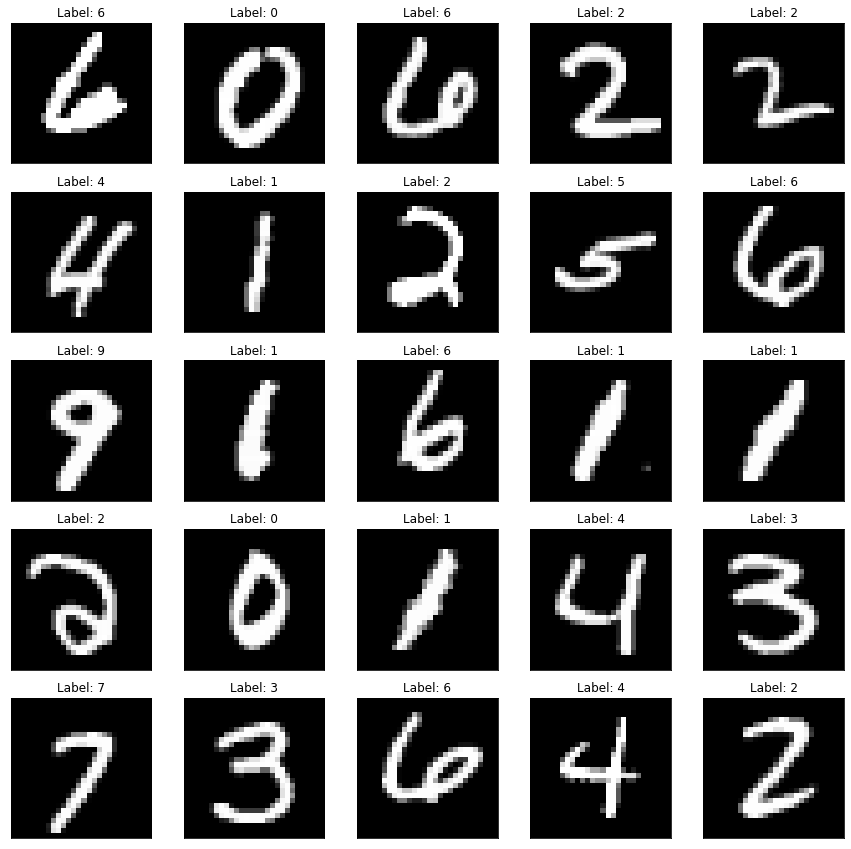

In [26]:
# Helper functions for images.

def show_img(img, ax=None, title=None):
    """Shows a single image."""
    if ax is None:
        ax = plt.gca()
    ax.imshow(img, cmap='gray')
    ax.set_xticks([])
    ax.set_yticks([])
    if title:
        ax.set_title(title)

def show_img_grid(imgs, titles):
    """Shows a grid of images."""
    n = int(np.ceil(len(imgs)**.5))
    _, axs = plt.subplots(n, n, figsize=(3 * n, 3 * n))
    for i, (img, title) in enumerate(zip(imgs, titles)):
        show_img(img, axs[i // n][i % n], title)

def show_examples(data, label, predicted = None):
    idxs = np.random.randint(0, len(data), 25)
    if np.array(label).max() <= 1:
        label = np.argmax(label, axis=-1)

    if predicted is not None:
        if np.array(predicted).max() <= 1:
            predicted = np.argmax(predicted, axis=-1)
    show_img_grid(
    [data[idx] for idx in idxs],
    [f'Label: {label[idx]}' if predicted is None else f'Label: {label[idx]}. Predicted: {predicted[idx]}' for idx in idxs],
    )

show_examples(X_test, y_test)

Посмотрим на то, в каком виде у нас хранятся входные признаки, напечатав размер первого объекта из обучающей выборки.

Для данных MNIST это изображения 28 на 28.

In [27]:
input_size = X_train[0].shape
print(f'Размер изображения {input_size} пикселей')

Размер изображения (28, 28) пикселей


## 3. Создание модели для обучения

Sequential здесь означает последовательный тип модели, в который мы добавляем слои друг за другом.

In [28]:
model = Sequential()

### Добавляем в модель слой за слоем. 
* сначала растягиваем картинку в длинный вектор слоем Flatten
* потом идет полносвязный слой - нейроны в следующем слое зависят от всех переменных в предыдущем
* далее применяем нелинейное преобразование relu
* потом идет следующий полносвязный слой. В нем 10 выходов - по числу классов
* в конце используем функцию активации


*Важно: в первом слое Sequential модели keras необходимо указать размерность входных данных, перед активацией делаем плотный слой с размерностью 10 по числу классов*


In [32]:
model.add(Flatten(input_shape=input_size))
model.add(Dense(units=64, input_shape=input_size))
model.add(Activation('elu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

После описания архитектуры необходимо скомпилировать модель, указав минимизируемую функцию потерь, 
оптимизатор и попросив модель выводить точность работы на тестовой выорке в процессе обучения

In [33]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

## 4. Обучение модели
**Тренировка с указанием данных, числа эпох и размера подвыборки** 

Теперь задана структура модели и то, как мы будем ее обучать.
Делаем это аналогично sklearn - с помощью метода fit.

После запуска fit мы оптиизируем параметры градиентым спуском.
На каждом шаге градиентного спуска мы используем функцию потерь, которая подсчитана только по части полной выборки.

Два дополнительных параметра для обучения:
* batch_size - размер подвыборки, которая используется для одного шага оптимизации =32
* epochs - число эпох - сколько раз мы проходим полностью по всей выборке




In [34]:
model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2329 - accuracy: 0.9657
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0729 - accuracy: 0.9826
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0645 - accuracy: 0.9840
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0574 - accuracy: 0.9852
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0495 - accuracy: 0.9873


Можно посмотреть, какие карточки мы использовали для обучения модели.

In [35]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18420989730804711281
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11345264640
locality {
  bus_id: 1
  links {
  }
}
incarnation: 16170545512998720262
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


Еще можно псотреть на нашу модель в целом: сколько в ней слоев, сколько параметров у каждого слоя с помощью команды model.summary()

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
activation (Activation)      (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_1 (Activation)    (None, 10)                0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                7

## 5. Валидация качества модели на тестовых данных.

Выводится loss и точность.

In [36]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1314 - accuracy: 0.9717


[0.13142837584018707, 0.9717000126838684]

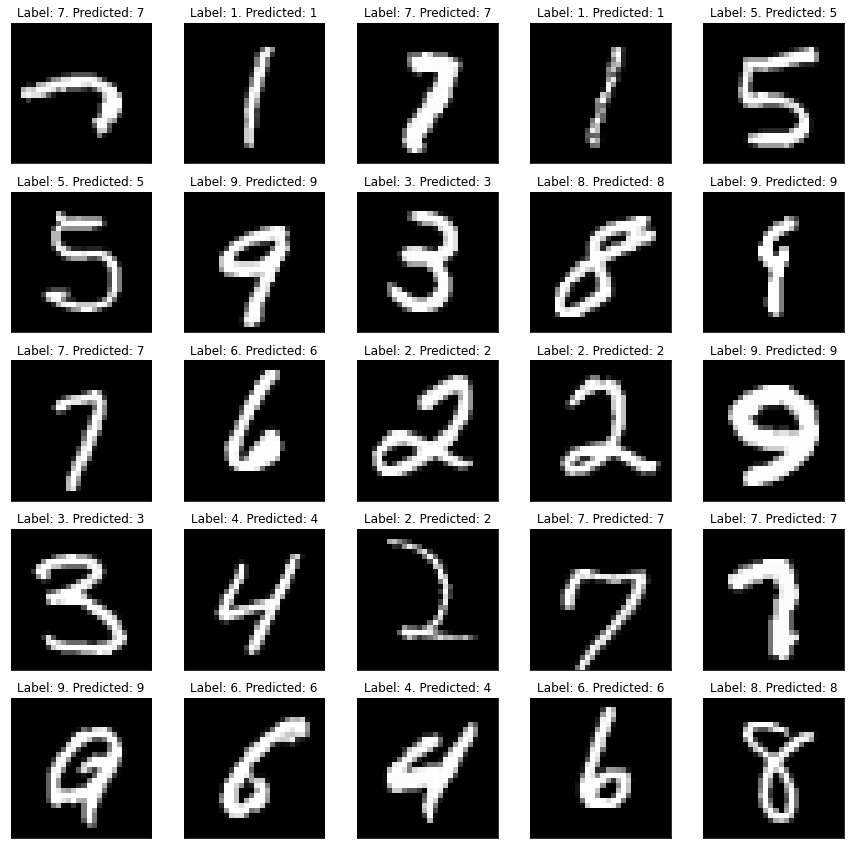

In [37]:
show_examples(X_test, y_test, model(X_test))

## 6. Улучшение модели

#### Добавим сверточный слой и посмотрим на результат.

Добавим явно число каналов в наш датасет - это важно для сверточных слоев. 
т.е. делается преобразование (60000, 28, 28) -> (60000, 28, 28, 1). Это ничего не изменяет.

In [38]:
X_train, X_test = X_train.reshape((60000, 28, 28, 1)), X_test.reshape((10000, 28, 28, 1))
input_size = X_train[0].shape
print(input_size)

(28, 28, 1)


Мы используем новый тип преобразвания в слое - сверточный Conv2D

In [39]:
from keras.layers import Conv2D

Создание модели. Sequential здесь означает последовательный тип модели, в который мы добавляем слои друг за другом

In [40]:
conv_model = Sequential()

Здесь мы используем сверточный слой, который тренирует 32 фильтра размером 3x3 для поиска 
 конкретных геометрических (настраиваемых в процессе обучения) паттернов на входном изображении.


In [41]:
conv_model.add(Conv2D(24, (3, 3), input_shape=input_size))
conv_model.add(Activation('relu'))
conv_model.add(Flatten())
conv_model.add(Dense(64, activation='relu'))
conv_model.add(Dense(10, activation='softmax'))

После описания архитектуры необходимо скомпилировать модель, указав минимизируемую функцию потерь, 
оптимизатор и попросив модель выводить точность работы на тестовой выорке в процессе обучения


In [42]:
conv_model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Тренировка с указанием данных, числа эпох и размера подвыборки

In [43]:
conv_model.fit(X_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 37s 5ms/step - loss: 0.1561 - accuracy: 0.9528
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0498 - accuracy: 0.9842
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0290 - accuracy: 0.9908
Epoch 4/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0172 - accuracy: 0.9945
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0126 - accuracy: 0.9962


In [44]:
conv_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 24)        240       
_________________________________________________________________
activation_6 (Activation)    (None, 26, 26, 24)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 16224)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                1038400   
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 1,039,290
Trainable params: 1,039,290
Non-trainable params: 0
_________________________________________________________________


Проверим качество работы модели на тестовых данных. Выводится loss и точночть.

In [45]:
conv_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.0681 - accuracy: 0.9830


[0.06809738278388977, 0.9829999804496765]

### Сверточные слои, dropout

Генерируются и обучаются несколько фильтров небольших размеров так, чтобы распознавать какие то характерные сочетания пикселей (паттерны). Ниже на картинке изображение 5x5 пикселей, фильтр имеет размеры 3x3. При этом на выходе такой операции имеем картинку такого же размера, в каждый из пикселей которого записан результат свертки (число) данного фильтра с картинкой при нахождении центра фильтра в этом пикселе. Для этого исходную картинку необходимо дополнить по краям. Обычно это делают либо нулями, либо дублируют ближайшие пиксели (padding)

![](https://raw.githubusercontent.com/MerkulovDaniil/TensorFlow_and_Keras_crash_course/master/rus/2_Deep%20Learning%20and%20Keras/convol.gif)

Чем глубже сверточный слой, тем более сложные паттерны он способен распознавать:

![](https://raw.githubusercontent.com/MerkulovDaniil/TensorFlow_and_Keras_crash_course/master/rus/2_Deep%20Learning%20and%20Keras/features.png)

Dropout - техника спасения нейросетей от переобучения, при которой в процессе тренировки случайно "выключаются" некоторые нейроны из моделей.

Альтернативный взгляд - вместо тренировки одной большой сети проходит одновременная тренировка нескольких подсетей меньшего размера, результаты которых потом усредняются (в каком то смысле, сглаживаются).

![](https://github.com/MerkulovDaniil/TensorFlow_and_Keras_crash_course/blob/master/rus/2_Deep%20Learning%20and%20Keras/dropout.gif?raw=true)

Давайте попробуем посмотреть, как написать сеть, состоящую из нескольких сверточных слоев на `keras`

In [46]:
from keras.layers import MaxPooling2D, Dropout

# Все так же, создаем модель
cnn = Sequential()

# Начинаем со сверточного слоя, указывая тип активации на выходе из него и способ заполнения краев (padding)
cnn.add(Conv2D(64, (3, 3), input_shape=input_size, activation='selu', padding='same'))

# Здесь мы используем метод MaxPooling, который уменьшает размер обрабатываемого изображения, 
# выбирая из 4 пикселей 1 с максимальным значением, чтобы это быстрее считалось. (2,2) -> 1
cnn.add(MaxPooling2D(pool_size=(2, 2)))

# Слой dropout, который на каждом шаге "выключает" 25% случайно выбранных нейронов
cnn.add(Dropout(0.25))

# Еще сверточный слой
cnn.add(Conv2D(32, (3, 3), input_shape=input_size, activation='selu', padding='same'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Dropout(0.5))

# Последний слой необходим для классификации, но перед ним необходимо векторизовать данные
cnn.add(Flatten())
cnn.add(Dense(10, activation='softmax'))


cnn.compile(loss='categorical_crossentropy',
                  optimizer = 'nadam',
                  metrics = ['accuracy'])

history_cnn = cnn.fit(X_train, y_train,
      batch_size=128,
      epochs=5,
      validation_data=(X_test, y_test))

Epoch 1/5
469/469 [==============================] - 8s 14ms/step - loss: 0.3596 - accuracy: 0.8884 - val_loss: 0.1021 - val_accuracy: 0.9678
Epoch 2/5
469/469 [==============================] - 6s 13ms/step - loss: 0.1312 - accuracy: 0.9600 - val_loss: 0.0623 - val_accuracy: 0.9788
Epoch 3/5
469/469 [==============================] - 6s 13ms/step - loss: 0.1009 - accuracy: 0.9689 - val_loss: 0.0511 - val_accuracy: 0.9830
Epoch 4/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0908 - accuracy: 0.9717 - val_loss: 0.0508 - val_accuracy: 0.9833
Epoch 5/5
469/469 [==============================] - 6s 13ms/step - loss: 0.0825 - accuracy: 0.9739 - val_loss: 0.0428 - val_accuracy: 0.9859


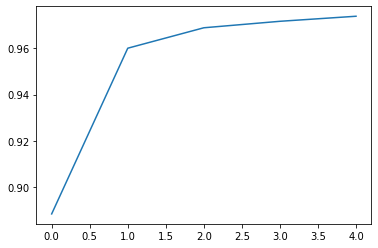

In [52]:
plt.plot(history_cnn.history['accuracy'])

# 📖✒🗣 Учим нейросеть говорить на прозе Пушкина.

![](https://www.meme-arsenal.com/memes/fef016cb71d40e3c893274c41afb3cbe.jpg)

In [51]:
from __future__ import print_function
from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import RMSprop
from keras.utils.data_utils import get_file
import numpy as np
import random
import sys
import io

path = get_file(
    'pushkin.txt',
    origin='https://raw.githubusercontent.com/MerkulovDaniil/TensorFlow_and_Keras_crash_course/master/pushkin.txt')
#     origin="https://s3.amazonaws.com/text-datasets/nietzsche.txt")             # Тексты Ницше
with io.open(path, encoding='utf-8') as f:
    text = f.read().lower()
print('Размер корпуса:', len(text))

chars = sorted(list(set(text)))
print('Всего символов:', len(chars))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('Количество фраз:', len(sentences))

print('Векторизация...')
x = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        x[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1


# build the model: a single LSTM
print('Строим модель...')
model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

optimizer = RMSprop(lr=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)


def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)


def on_epoch_end(epoch, _):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Вот, что я могу сказать по этому поводу после эпохи № %d' % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    for diversity in [0.1, 0.2, 0.3]:
        print('----- Вариативность:', diversity)

        generated = ''
        sentence = text[start_index: start_index + maxlen]
        generated += sentence
        print('----- Входная последовательность: "' + sentence + '"')
        sys.stdout.write('🤖: '+generated)

        for i in range(300):
            x_pred = np.zeros((1, maxlen, len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, diversity)
            next_char = indices_char[next_index]

            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print()
        
    print()
    print('----- Не злитесь, я только учусь 🐱')

print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

model.fit(x, y,
          batch_size=128,
          epochs=50,
          callbacks=[print_callback])

950272/941229 [==============================] - 0s 0us/step
Размер корпуса: 525864
Всего символов: 85
Количество фраз: 175275
Векторизация...
Строим модель...


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/50
1370/1370 [==============================] - 23s 15ms/step - loss: 2.3754

----- Вот, что я могу сказать по этому поводу после эпохи № 0
----- Вариативность: 0.1
----- Входная последовательность: "я, закон казнит. спасти нельзя мне брата"
🤖: я, закон казнит. спасти нельзя мне братались в полем полед старую старую старую старух полед старую старую старую в сом не старую старух старулся в полнел старую старух полед не все старулся в старух полед старую старую полед отверный полед полед старулся в старух полед старую старой старух полед полед не старую старую старух полед полед 
----- Вариативность: 0.2
----- Входная последовательность: "я, закон казнит. спасти нельзя мне брата"
🤖: я, закон казнит. спасти нельзя мне братая полнил сказал сказал старую полед там, не все старуг в сердце примела в старух проитил сказал старик он и волна старической старуг волным старух городу не старую старом он колены на старую старух полем не полед и в не проволоны на старик все своей полед стару

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: RuntimeWarning: divide by zero encountered in log


селом волна, не тому все проснулся о молодые приводит, ответ без домой своего молодые отвечает; он на строй на полном под его простител на меч из находит, страшный не

----- Не злитесь, я только учусь 🐱


# 🧠👶🐶 Fine-Tuning

[source](https://d2l.ai/chapter_computer-vision/fine-tuning.html)

In earlier chapters, we discussed how to train models on the Fashion-MNIST training dataset, which only has 60,000 images. We also described ImageNet, the most widely used large-scale image dataset in the academic world, with more than 10 million images and objects of over 1000 categories. However, the size of datasets that we often deal with is usually larger than the first, but smaller than the second.

Assume we want to identify different kinds of chairs in images and then push the purchase link to the user. One possible method is to first find a hundred common chairs, take one thousand different images with different angles for each chair, and then train a classification model on the collected image dataset. Although this dataset may be larger than Fashion-MNIST, the number of examples is still less than one tenth of ImageNet. This may result in the overfitting of the complicated model applicable to ImageNet on this dataset. At the same time, because of the limited amount of data, the accuracy of the final trained model may not meet the practical requirements.

In order to deal with the above problems, an obvious solution is to collect more data. However, collecting and labeling data can consume a lot of time and money. For example, in order to collect the ImageNet datasets, researchers have spent millions of dollars of research funding. Although, recently, data collection costs have dropped significantly, the costs still cannot be ignored.

Another solution is to apply transfer learning to migrate the knowledge learned from the source dataset to the target dataset. For example, although the images in ImageNet are mostly unrelated to chairs, models trained on this dataset can extract more general image features that can help identify edges, textures, shapes, and object composition. These similar features may be equally effective for recognizing a chair.

In this section, we introduce a common technique in transfer learning: fine tuning. As shown in :numref:`fig_finetune`, fine tuning consists of the following four steps:

1. Pre-train a neural network model, i.e., the source model, on a source dataset (e.g., the ImageNet dataset).
2. Create a new neural network model, i.e., the target model. This replicates all model designs and their parameters on the source model, except the output layer. We assume that these model parameters contain the knowledge learned from the source dataset and this knowledge will be equally applicable to the target dataset. We also assume that the output layer of the source model is closely related to the labels of the source dataset and is therefore not used in the target model.
3. Add an output layer whose output size is the number of target dataset categories to the target model, and randomly initialize the model parameters of this layer.
4. Train the target model on a target dataset, such as a chair dataset. We will train the output layer from scratch, while the parameters of all remaining layers are fine-tuned based on the parameters of the source model.

![Fine tuning. ](http://d2l.ai/_images/finetune.svg)

### Hot Dog Recognition

Next, we will use a specific example for practice: hot dog recognition. We will fine-tune the ResNet model trained on the ImageNet dataset based on a small dataset. This small dataset contains thousands of images, some of which contain hot dogs. We will use the model obtained by fine tuning to identify whether an image contains a hot dog.

First, import the packages and modules required for the experiment.  Gluon's `model_zoo` package provides a common pre-trained model. If you want to get more pre-trained models for computer vision, you can use the [GluonCV Toolkit](https://gluon-cv.mxnet.io).


In [18]:
%matplotlib inline
!pip3 install d2l --quiet
from d2l import torch as d2l
from torch import nn
import torch
import torchvision
import os

## Obtaining the Dataset

The hot dog dataset we use was taken from online images and contains $1,400$ positive images containing hot dogs and the same number of negative images containing other foods. $1,000$ images of various classes are used for training and the rest are used for testing.

We first download the compressed dataset and get two folders `hotdog/train` and `hotdog/test`. Both folders have `hotdog` and `not-hotdog` category subfolders, each of which has corresponding image files.


In [19]:
#@save
d2l.DATA_HUB['hotdog'] = (d2l.DATA_URL+'hotdog.zip', 
                         'fba480ffa8aa7e0febbb511d181409f899b9baa5')

data_dir = d2l.download_extract('hotdog')

We create two `ImageFolderDataset` instances to read all the image files in the training dataset and testing dataset, respectively.


In [20]:
train_imgs = torchvision.datasets.ImageFolder(os.path.join(data_dir, 'train'))
test_imgs = torchvision.datasets.ImageFolder(os.path.join(data_dir, 'test'))

The first 8 positive examples and the last 8 negative images are shown below. As you can see, the images vary in size and aspect ratio.


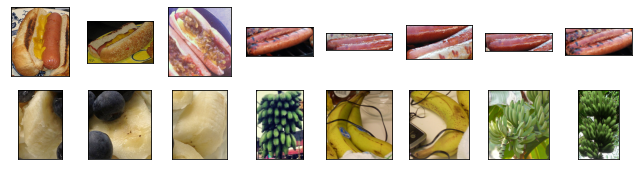

In [21]:
hotdogs = [train_imgs[i][0] for i in range(8)]
not_hotdogs = [train_imgs[-i - 1][0] for i in range(8)]
d2l.show_images(hotdogs + not_hotdogs, 2, 8, scale=1.4);

During training, we first crop a random area with random size and random aspect ratio from the image and then scale the area to an input with a height and width of 224 pixels. During testing, we scale the height and width of images to 256 pixels, and then crop the center area with height and width of 224 pixels to use as the input. In addition, we normalize the values of the three RGB (red, green, and blue) color channels. The average of all values of the channel is subtracted from each value and then the result is divided by the standard deviation of all values of the channel to produce the output.


In [22]:
# We specify the mean and variance of the three RGB channels to normalize the
# image channel
normalize = torchvision.transforms.Normalize(
    [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

train_augs = torchvision.transforms.Compose([
    torchvision.transforms.RandomResizedCrop(224),
    torchvision.transforms.RandomHorizontalFlip(),
    torchvision.transforms.ToTensor(),
    normalize])

test_augs = torchvision.transforms.Compose([
    torchvision.transforms.Resize(256),
    torchvision.transforms.CenterCrop(224),
    torchvision.transforms.ToTensor(),
    normalize])

## Defining and Initializing the Model

We use ResNet-18, which was pre-trained on the ImageNet dataset, as the source model. Here, we specify `pretrained=True` to automatically download and load the pre-trained model parameters. The first time they are used, the model parameters need to be downloaded from the Internet.


In [23]:
pretrained_net = torchvision.models.resnet18(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

The pre-trained source model instance contains two member variables: `features` and `output`. The former contains all layers of the model, except the output layer, and the latter is the output layer of the model. The main purpose of this division is to facilitate the fine tuning of the model parameters of all layers except the output layer. The member variable `output` of source model is given below. As a fully connected layer, it transforms ResNet's final global average pooling layer output into 1000 class output on the ImageNet dataset.


In [24]:
pretrained_net.fc

Linear(in_features=512, out_features=1000, bias=True)

We then build a new neural network to use as the target model. It is defined in the same way as the pre-trained source model, but the final number of outputs is equal to the number of categories in the target dataset. In the code below, the model parameters in the member variable `features` of the target model instance `finetune_net` are initialized to model parameters of the corresponding layer of the source model. Because the model parameters in `features` are obtained by pre-training on the ImageNet dataset, it is good enough. Therefore, we generally only need to use small learning rates to "fine-tune" these parameters. In contrast, model parameters in the member variable `output` are randomly initialized and generally require a larger learning rate to learn from scratch. Assume the learning rate in the `Trainer` instance is $\eta$ and use a learning rate of $10\eta$ to update the model parameters in the member variable `output`.


In [25]:
finetune_net = torchvision.models.resnet18(pretrained=True)
finetune_net.fc = nn.Linear(finetune_net.fc.in_features, 2)
nn.init.xavier_uniform_(finetune_net.fc.weight);
# If `param_group=True`, the model parameters in fc layer will be updated 
# using a learning rate ten times greater, defined in the trainer.

## Fine Tuning the Model

We first define a training function `train_fine_tuning` that uses fine tuning so it can be called multiple times.


In [26]:
def train_fine_tuning(net, learning_rate, batch_size=128, num_epochs=5,
                      param_group=True):
    train_iter = torch.utils.data.DataLoader(torchvision.datasets.ImageFolder(
        os.path.join(data_dir, 'train'), transform=train_augs),
        batch_size=batch_size, shuffle=True)
    test_iter = torch.utils.data.DataLoader(torchvision.datasets.ImageFolder(
        os.path.join(data_dir, 'test'), transform=test_augs),
        batch_size=batch_size)
    devices = d2l.try_all_gpus()
    loss = nn.CrossEntropyLoss(reduction="none")
    if param_group:
        params_1x = [param for name, param in net.named_parameters()
             if name not in ["fc.weight", "fc.bias"]]
        trainer = torch.optim.SGD([{'params': params_1x},
                                   {'params': net.fc.parameters(),
                                    'lr': learning_rate * 10}],
                                lr=learning_rate, weight_decay=0.001)
    else:
        trainer = torch.optim.SGD(net.parameters(), lr=learning_rate,
                                  weight_decay=0.001)    
    d2l.train_ch13(net, train_iter, test_iter, loss, trainer, num_epochs,
                   devices)

We set the learning rate in the `Trainer` instance to a smaller value, such as 0.01, in order to fine-tune the model parameters obtained in pretraining. Based on the previous settings, we will train the output layer parameters of the target model from scratch using a learning rate ten times greater.


loss 0.181, train acc 0.936, test acc 0.935
168.6 examples/sec on [device(type='cuda', index=0)]


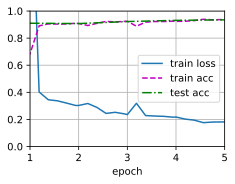

In [27]:
train_fine_tuning(finetune_net, 5e-5)

For comparison, we define an identical model, but initialize all of its model parameters to random values. Since the entire model needs to be trained from scratch, we can use a larger learning rate.


loss 0.397, train acc 0.831, test acc 0.820
170.4 examples/sec on [device(type='cuda', index=0)]


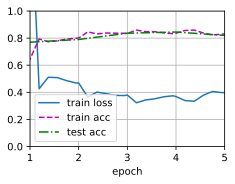

In [28]:
scratch_net = torchvision.models.resnet18()
scratch_net.fc = nn.Linear(scratch_net.fc.in_features, 2)
train_fine_tuning(scratch_net, 5e-4, param_group=False)

As you can see, the fine-tuned model tends to achieve higher precision in the same epoch because the initial values of the parameters are better.


## Summary


* Transfer learning migrates the knowledge learned from the source dataset to the target dataset. Fine tuning is a common technique for transfer learning.
* The target model replicates all model designs and their parameters on the source model, except the output layer, and fine-tunes these parameters based on the target dataset. In contrast, the output layer of the target model needs to be trained from scratch.
* Generally, fine tuning parameters use a smaller learning rate, while training the output layer from scratch can use a larger learning rate.

In [29]:
for param in finetune_net.parameters():
    param.requires_grad = False

4. In fact, there is also a "hotdog" class in the `ImageNet` dataset. Its corresponding weight parameter at the output layer can be obtained by using the following code. How can we use this parameter?


In [30]:
weight = pretrained_net.fc.weight
hotdog_w = torch.split(weight.data, 1, dim=0)[713]
hotdog_w.shape

torch.Size([1, 512])

# 🎨🖼🚌 Neural style transfer

[source](https://d2l.ai/chapter_computer-vision/neural-style.html)

If you use social sharing apps or happen to be an amateur photographer, you are familiar with filters. Filters can alter the color styles of photos to make the background sharper or people's faces whiter. However, a filter generally can only change one aspect of a photo. To create the ideal photo, you often need to try many different filter combinations. This process is as complex as tuning the hyperparameters of a model.

In this section, we will discuss how we can use convolution neural networks
(CNNs) to automatically apply the style of one image to another image, an
operation known as style transfer :cite:`Gatys.Ecker.Bethge.2016`. Here, we need two input images, one content image and one style image. We use a neural network to alter the content image so that its style mirrors that of the style image. The content image is a landscape photo the author took in Mount Rainier National Part near Seattle. The style image is an oil painting of oak trees in autumn. The output composite image retains the overall shapes of the objects in the content image, but applies the oil painting brushwork of the style image and makes the overall color more vivid.

![Content and style input images and composite image produced by style transfer. ](https://raw.githubusercontent.com/d2l-ai/d2l-pytorch-colab/master/img/style-transfer.svg)

## Technique

The CNN-based style transfer model is shown in :numref:`fig_style_transfer_model`.
First, we initialize the composite image. For example, we can initialize it as the content image. This composite image is the only variable that needs to be updated in the style transfer process, i.e., the model parameter to be updated in style transfer. Then, we select a pre-trained CNN to extract image features. These model parameters do not need to be updated during training. The deep CNN uses multiple neural layers that successively extract image features. We can select the output of certain layers to use as content features or style features. If we use the structure in :numref:`fig_style_transfer_model`, the pre-trained neural network contains three convolutional layers. The second layer outputs the image content features, while the outputs of the first and third layers are used as style features. Next, we use forward propagation (in the direction of the solid lines) to compute the style transfer loss function and backward propagation (in the direction of the dotted lines) to update the model parameter, constantly updating the composite image. The loss functions used in style transfer generally have three parts: 1. Content loss is used to make the composite image approximate the content image as regards content features. 2. Style loss is used to make the composite image approximate the style image in terms of style features. 3. Total variation loss helps reduce the noise in the composite image. Finally, after we finish training the model, we output the style transfer model parameters to obtain the final composite image.

![CNN-based style transfer process. Solid lines show the direction of forward propagation and dotted lines show backward propagation. ](https://raw.githubusercontent.com/d2l-ai/d2l-pytorch-colab/master/img/neural-style.svg)

Next, we will perform an experiment to help us better understand the technical details of style transfer.

### Reading the Content and Style Images

First, we read the content and style images. By printing out the image coordinate axes, we can see that they have different dimensions.


In [53]:
# Donwloading files locally
!pip install wget
import wget
import os

print('Beginning files download with wget module')

if os.path.exists('rainier.jpg'):
    os.remove('rainier.jpg') 
url = 'https://cdn.vdmsti.ru/image/2021/75/18xbyo/original-1m83.jpg'
wget.download(url, 'rainier.jpg')

if os.path.exists('autumn-oak.jpg'):
    os.remove('autumn-oak.jpg') 
url = 'https://raw.githubusercontent.com/d2l-ai/d2l-pytorch-colab/master/img/autumn-oak.jpg'
wget.download(url, 'autumn-oak.jpg')

Beginning files download with wget module


'autumn-oak.jpg'

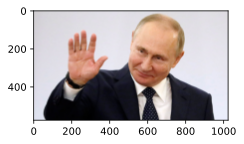

In [54]:
%matplotlib inline
from d2l import torch as d2l
import torch
import torchvision
from torch import nn



d2l.set_figsize()
content_img = d2l.Image.open('rainier.jpg')
d2l.plt.imshow(content_img);

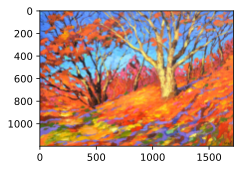

In [55]:
style_img = d2l.Image.open('autumn-oak.jpg')
d2l.plt.imshow(style_img);

## Preprocessing and Postprocessing

Below, we define the functions for image preprocessing and postprocessing. The `preprocess` function normalizes each of the three RGB channels of the input images and transforms the results to a format that can be input to the CNN. The `postprocess` function restores the pixel values in the output image to their original values before normalization. Because the image printing function requires that each pixel has a floating point value from 0 to 1, we use the `clip` function to replace values smaller than 0 or greater than 1 with 0 or 1, respectively.


In [56]:
rgb_mean = torch.tensor([0.485, 0.456, 0.406])
rgb_std = torch.tensor([0.229, 0.224, 0.225])

def preprocess(img, image_shape):
    transforms = torchvision.transforms.Compose([
        torchvision.transforms.Resize(image_shape),
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize(mean=rgb_mean, std=rgb_std)])
    return transforms(img).unsqueeze(0)

def postprocess(img):
    img = img[0].to(rgb_std.device)
    img = torch.clamp(img.permute(1, 2, 0) * rgb_std + rgb_mean, 0, 1)
    return torchvision.transforms.ToPILImage()(img.permute(2, 0, 1))

## Extracting Features

We use the VGG-19 model pre-trained on the ImageNet dataset to extract image features[1].


In [57]:
pretrained_net = torchvision.models.vgg19(pretrained=True)

To extract image content and style features, we can select the outputs of certain layers in the VGG network. In general, the closer an output is to the input layer, the easier it is to extract image detail information. The farther away an output is, the easier it is to extract global information. To prevent the composite image from retaining too many details from the content image, we select a VGG network layer near the output layer to output the image content features. This layer is called the content layer. We also select the outputs of different layers from the VGG network for matching local and global styles. These are called the style layers. As we mentioned in :numref:`sec_vgg`, VGG networks have five convolutional blocks. In this experiment, we select the last convolutional layer of the fourth convolutional block as the content layer and the first layer of each block as style layers. We can obtain the indexes for these layers by printing the `pretrained_net` instance.


In [58]:
style_layers, content_layers = [0, 5, 10, 19, 28], [25]

During feature extraction, we only need to use all the VGG layers from the input layer to the content or style layer nearest the output layer. Below, we build a new network, `net`, which only retains the layers in the VGG network we need to use. We then use `net` to extract features.


In [60]:
net = nn.Sequential(*[pretrained_net.features[i] for i in
                      range(max(content_layers + style_layers) + 1)])

Given input `X`, if we simply call the forward computation `net(X)`, we can only obtain the output of the last layer. Because we also need the outputs of the intermediate layers, we need to perform layer-by-layer computation and retain the content and style layer outputs.


In [61]:
def extract_features(X, content_layers, style_layers):
    contents = []
    styles = []
    for i in range(len(net)):
        X = net[i](X)
        if i in style_layers:
            styles.append(X)
        if i in content_layers:
            contents.append(X)
    return contents, styles

Next, we define two functions: The `get_contents` function obtains the content features extracted from the content image, while the `get_styles` function obtains the style features extracted from the style image. Because we do not need to change the parameters of the pre-trained VGG model during training, we can extract the content features from the content image and style features from the style image before the start of training. As the composite image is the model parameter that must be updated during style transfer, we can only call the `extract_features` function during training to extract the content and style features of the composite image.


In [62]:
def get_contents(image_shape, device):
    content_X = preprocess(content_img, image_shape).to(device)
    contents_Y, _ = extract_features(content_X, content_layers, style_layers)
    return content_X, contents_Y

def get_styles(image_shape, device):
    style_X = preprocess(style_img, image_shape).to(device)
    _, styles_Y = extract_features(style_X, content_layers, style_layers)
    return style_X, styles_Y

## Defining the Loss Function

Next, we will look at the loss function used for style transfer. The loss function includes the content loss, style loss, and total variation loss.

### Content Loss

Similar to the loss function used in linear regression, content loss uses a square error function to measure the difference in content features between the composite image and content image. The two inputs of the square error function are both content layer outputs obtained from the `extract_features` function.


In [63]:
def content_loss(Y_hat, Y):
    # we 'detach' the target content from the tree used
    # to dynamically compute the gradient: this is a stated value,
    # not a variable. Otherwise the loss will throw an error.
    return torch.square(Y_hat - Y.detach()).mean()

### Style Loss

Style loss, similar to content loss, uses a square error function to measure the difference in style between the composite image and style image. To express the styles output by the style layers, we first use the `extract_features` function to compute the style layer output. Assuming that the output has 1 example, $c$ channels, and a height and width of $h$ and $w$, we can transform the output into the matrix $\mathbf{X}$, which has $c$ rows and $h \cdot w$ columns. You can think of matrix $\mathbf{X}$ as the combination of the $c$ vectors $\mathbf{x}_1, \ldots, \mathbf{x}_c$, which have a length of $hw$. Here, the vector $\mathbf{x}_i$ represents the style feature of channel $i$. In the Gram matrix of these vectors $\mathbf{X}\mathbf{X}^\top \in \mathbb{R}^{c \times c}$, element $x_{ij}$ in row $i$ column $j$ is the inner product of vectors $\mathbf{x}_i$ and $\mathbf{x}_j$. It represents the correlation of the style features of channels $i$ and $j$. We use this type of Gram matrix to represent the style output by the style layers. You must note that, when the $h \cdot w$ value is large, this often leads to large values in the Gram matrix. In addition, the height and width of the Gram matrix are both the number of channels $c$. To ensure that the style loss is not affected by the size of these values, we define the `gram` function below to divide the Gram matrix by the number of its elements, i.e., $c \cdot h \cdot w$.


In [64]:
def gram(X):
    num_channels, n = X.shape[1], X.numel() // X.shape[1]
    X = X.reshape((num_channels, n))
    return torch.matmul(X, X.T) / (num_channels * n)

Naturally, the two Gram matrix inputs of the square error function for style loss are taken from the composite image and style image style layer outputs. Here, we assume that the Gram matrix of the style image, `gram_Y`, has been computed in advance.


In [65]:
def style_loss(Y_hat, gram_Y):
    return torch.square(gram(Y_hat) - gram_Y.detach()).mean()

### Total Variance Loss

Sometimes, the composite images we learn have a lot of high-frequency noise, particularly bright or dark pixels. One common noise reduction method is total variation denoising. We assume that $x_{i, j}$ represents the pixel value at the coordinate $(i, j)$, so the total variance loss is:

$$\sum_{i, j} \left|x_{i, j} - x_{i+1, j}\right| + \left|x_{i, j} - x_{i, j+1}\right|.$$

We try to make the values of neighboring pixels as similar as possible.


In [66]:
def tv_loss(Y_hat):
    return 0.5 * (torch.abs(Y_hat[:, :, 1:, :] - Y_hat[:, :, :-1, :]).mean() +
                  torch.abs(Y_hat[:, :, :, 1:] - Y_hat[:, :, :, :-1]).mean())

### Loss Function

The loss function for style transfer is the weighted sum of the content loss, style loss, and total variance loss. By adjusting these weight hyperparameters, we can balance the retained content, transferred style, and noise reduction in the composite image according to their relative importance.


In [67]:
content_weight, style_weight, tv_weight = 1, 1e3, 10

def compute_loss(X, contents_Y_hat, styles_Y_hat, contents_Y, styles_Y_gram):
    # Calculate the content, style, and total variance losses respectively
    contents_l = [content_loss(Y_hat, Y) * content_weight for Y_hat, Y in zip(
        contents_Y_hat, contents_Y)]
    styles_l = [style_loss(Y_hat, Y) * style_weight for Y_hat, Y in zip(
        styles_Y_hat, styles_Y_gram)]
    tv_l = tv_loss(X) * tv_weight
    # Add up all the losses
    l = sum(styles_l + contents_l + [tv_l])
    return contents_l, styles_l, tv_l, l

## Creating and Initializing the Composite Image

In style transfer, the composite image is the only variable that needs to be updated. Therefore, we can define a simple model, `GeneratedImage`, and treat the composite image as a model parameter. In the model, forward computation only returns the model parameter.


In [74]:
class GeneratedImage(nn.Module):
    def __init__(self, img_shape, **kwargs):
        super(GeneratedImage, self).__init__(**kwargs)
        self.weight = nn.Parameter(torch.rand(*img_shape))

    def forward(self):
        return self.weight

Next, we define the `get_inits` function. This function creates a composite image model instance and initializes it to the image `X`. The Gram matrix for the various style layers of the style image, `styles_Y_gram`, is computed prior to training.


In [75]:
def get_inits(X, device, lr, styles_Y):
    gen_img = GeneratedImage(X.shape).to(device)
    gen_img.weight.data.copy_(X.data)
    trainer = torch.optim.Adam(gen_img.parameters(), lr=lr)
    styles_Y_gram = [gram(Y) for Y in styles_Y]
    return gen_img(), styles_Y_gram, trainer

## Training

During model training, we constantly extract the content and style features of
the composite image and calculate the loss function. Recall our discussion of
how synchronization functions force the front end to wait for computation
results in :numref:`sec_async`. Because we only call the `asnumpy` synchronization function every 10
epochs, the process may occupy a great deal of memory. Therefore, we call the
`waitall` synchronization function during every epoch.


In [76]:
def train(X, contents_Y, styles_Y, device, lr, num_epochs, lr_decay_epoch):
    X, styles_Y_gram, trainer = get_inits(X, device, lr, styles_Y)
    scheduler = torch.optim.lr_scheduler.StepLR(trainer, lr_decay_epoch)
    animator = d2l.Animator(xlabel='epoch', ylabel='loss',
                            xlim=[10, num_epochs],
                            legend=['content', 'style', 'TV'],
                            ncols=2, figsize=(7, 2.5))
    for epoch in range(num_epochs):
        trainer.zero_grad()
        contents_Y_hat, styles_Y_hat = extract_features(
            X, content_layers, style_layers)
        contents_l, styles_l, tv_l, l = compute_loss(
            X, contents_Y_hat, styles_Y_hat, contents_Y, styles_Y_gram)
        l.backward()
        trainer.step()
        scheduler.step()
        if (epoch + 1) % 10 == 0:
            animator.axes[1].imshow(postprocess(X))
            animator.add(epoch + 1, [float(sum(contents_l)),
                                     float(sum(styles_l)), float(tv_l)])
    return X

Next, we start to train the model. First, we set the height and width of the content and style images to 150 by 225 pixels. We use the content image to initialize the composite image.


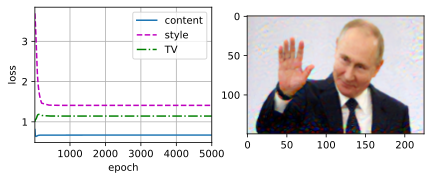

In [73]:
device, image_shape = d2l.try_gpu(), (150, 225) # PIL Image (h, w)
net = net.to(device)
content_X, contents_Y = get_contents(image_shape, device)
_, styles_Y = get_styles(image_shape, device)
output = train(content_X, contents_Y, styles_Y, device, 0.01, 50, 200)

As you can see, the composite image retains the scenery and objects of the content image, while introducing the color of the style image. Because the image is relatively small, the details are a bit fuzzy.

To obtain a clearer composite image, we train the model using a larger image size: $900 \times 600$. We increase the height and width of the image used before by a factor of four and initialize a larger composite image.


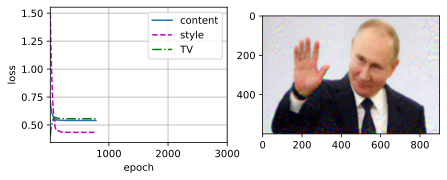

In [ ]:
image_shape = (600, 900) # PIL Image (h, w)
_, content_Y = get_contents(image_shape, device)
_, style_Y = get_styles(image_shape, device)
X = preprocess(postprocess(output), image_shape).to(device)
output = train(X, content_Y, style_Y, device, 0.01, 3000, 100)
d2l.plt.imsave('neural-style.jpg', postprocess(output))

As you can see, each epoch takes more time due to the larger image size. As shown in figure, the composite image produced retains more detail due to its larger size. The composite image not only has large blocks of color like the style image, but these blocks even have the subtle texture of brush strokes.

![](https://github.com/MerkulovDaniil/sber219/blob/main/notebooks/neural-style.jpg?raw=1)

## Summary

* The loss functions used in style transfer generally have three parts: 1. Content loss is used to make the composite image approximate the content image as regards content features. 2. Style loss is used to make the composite image approximate the style image in terms of style features. 3. Total variation loss helps reduce the noise in the composite image.
* We can use a pre-trained CNN to extract image features and minimize the loss function to continuously update the composite image.
* We use a Gram matrix to represent the style output by the style layers.

# Ссылки

* [TensorFlow sandbox](https://playground.tensorflow.org)
* [Запуск TensorFlow на GPU](http://learningtensorflow.com/lesson10/)
* [Визуализация модели](https://www.codesofinterest.com/2017/05/visualizing-keras-models-updated.html)
* [Официальная документация](https://keras.io/) - библиотека отлично документирована
* [Keras в конкретных примерах](https://github.com/tmheo/keras_exercise) - 25 отличных jupyter notebooks
* [Упражнения и примеры в Keras и TensorFlow](https://github.com/leriomaggio/deep-learning-keras-tensorflow)